In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [13]:
# Load dataset
df = pd.read_csv("C:\\Users\\Khushi's PC\\OneDrive\\Desktop\\Housing.csv")

In [18]:
# Features and target
X = df.drop('price', axis=1)
y = df['price']

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()

# Create preprocessing pipeline
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), categorical_cols)
], remainder='passthrough')

# Create the model pipeline
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f" Mean Squared Error (MSE): ₹ {mse:,.2f}")
print(f" R-squared Score (R²): {r2:.4f}")



 Mean Squared Error (MSE): ₹ 1,754,318,687,330.68
 R-squared Score (R²): 0.6529


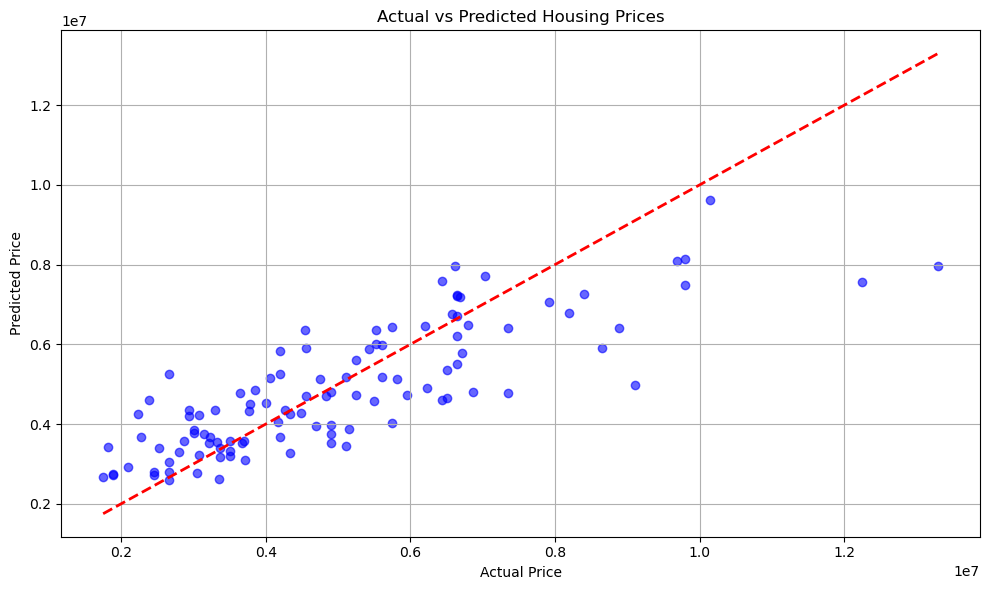

In [23]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Housing Prices')
plt.grid(True)
plt.tight_layout()
plt.show()
